# Assignment #1

Please follow instruction below to complete your assingment. 
You are expected to provide:
- data files
- IPython notebook

Please use code blocks to comment and explain your code.

STUDENT ID: 26754

In [295]:
%matplotlib inline 
import os, sys
import json
import networkx as nx
from random import seed
from random import random

# Import any other package you may need
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import pandas as pd
from pprint import pprint



## Erdos-Renyi network simulation

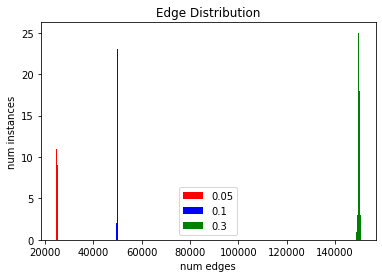

In [ ]:
seed(1)

def decide_edge_exist(p):
    return random.random() < p

def simulate_erdos_renyi(N, p):
    graph = nx.Graph()

    for i in range(1,N+1):
      for j in range(i+1, N+1):
        if i < j:
          if random() < p:
            graph.add_edge(i, j)
    return graph



plt.gca().set(title='Edge Distribution', xlabel='num edges', ylabel='num instances')


x = 0
for p in [0.05, 0.1, 0.3]:
  instance = []
  for i in range(100):
    graph = simulate_erdos_renyi(1000,p)
    num_edges = graph.number_of_edges()
    instance.append(num_edges)

  col = ""
  lab = ''
  if p == 0.05:
    col = "red"
    lab = '0.05'
  elif p == 0.1:
    col = "blue"
    lab = '0.1'

  else:
    col = "green"
    lab = '0.3'

  
  plt.hist(instance, color=col, label=lab)
  x = x + 1
plt.legend();


'\nYou will need to simulate 100 random initializations for \np=0.05, p=0.1 and p=0.3 and \nplot distributions for number of edges in a single figure.\n'

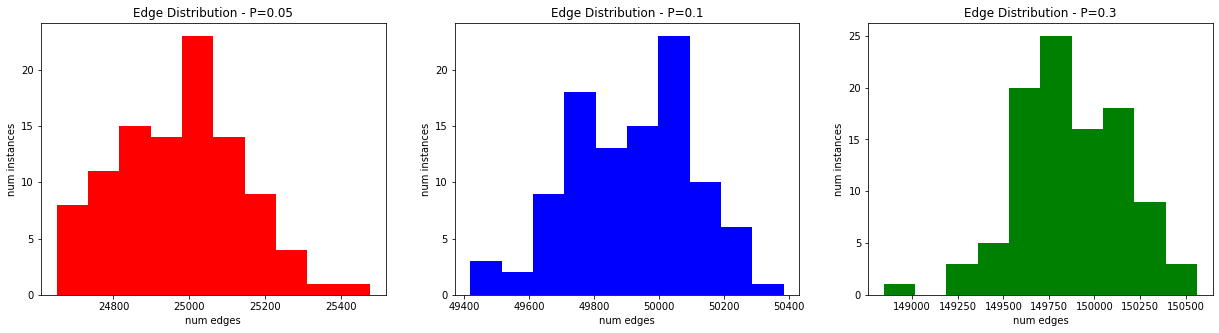

In [ ]:
seed(1)

def decide_edge_exist(p):
    return random.random() < p

def simulate_erdos_renyi(N, p):
    graph = nx.Graph()

    for i in range(1,N+1):
      for j in range(i+1, N+1):
        if i < j:
          if random() < p:
            graph.add_edge(i, j)
    return graph


fig, axes = plt.subplots(1, 3,figsize=(21,5))
axes[0].set(title='Edge Distribution - P=0.05', xlabel='num edges', ylabel='num instances')
axes[1].set(title='Edge Distribution - P=0.1', xlabel='num edges', ylabel='num instances')
axes[2].set(title='Edge Distribution - P=0.3', xlabel='num edges', ylabel='num instances')

x = 0
for p in [0.05, 0.1, 0.3]:
  instance = []
  for i in range(100):
    graph = simulate_erdos_renyi(1000,p)
    num_edges = graph.number_of_edges()
    instance.append(num_edges)

  col = ""
  if p == 0.05:
    col = "red"
  elif p == 0.1:
    col = "blue"
  else:
    col = "green"
  
  axes[x].hist(instance, color=col)
  x = x + 1


'''
You will need to simulate 100 random initializations for 
p=0.05, p=0.1 and p=0.3 and 
plot distributions for number of edges in a single figure.
'''


# Network generation and node properties

Request and download dataset for your own social media accounts and analyze 

*   List item
*   List item

using network science methods.

If you are not a frequnt users, you can select 3 networks with different categorical subdomains using the database below.

https://icon.colorado.edu/#!/networks

Please keep the networks smaller than 10.000 nodes.

Explore the different algorithms available on networkx for node and graph level properties.
https://networkx.org/documentation/stable/reference/algorithms/index.html

You should cover at least 
- node clustering coefficient, degree, strength
- graph density, largest connected components size, radius

### Network analysis

Germany High Voltage Network

Density
----------------------------------------
0.005721814417466591 


Connected Component analysis
----------------------------------------
Is digraph strongly connected?:  False
Number of strongly connected components:  225
Largest connected component:  6


Radius
----------------------------------------
Since this digraph is not strongly connected, infinite paths are found and 
the 'radius' function gives following error: 

NetworkXError: Found infinite path length because the digraph 
is not strongly connected



Graph Assortivity
----------------------------------------
Graph Assortivity:  -0.1010689994479012


Distance-Regular
----------------------------------------
Is distance-regular?:  False




Transitivity
----------------------------------------
Transitivity:  0.04225352112676056




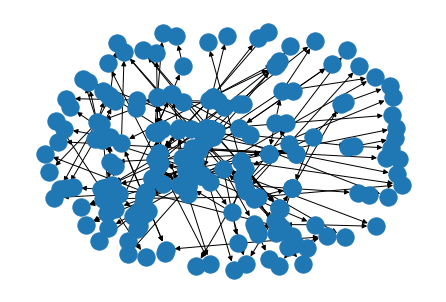

In [302]:
# Load network
df = pd.read_csv('germany_high-voltage_network.csv',sep='\t')

df.columns = ['From_node', 'To_node', 'X', 'Pmax']

#Connections are directed
graph = nx.DiGraph()

for index, row in df.iterrows():
  graph.add_edge(row['From_node'], row['To_node'], weight=row['Pmax'])

# Compute node and graph properties. Keep node properties in the GEXF file and print graph properties here

nx.draw(graph)

#Network Feature Analysis
print("Density")
print("----------------------------------------")
density = nx.density(graph)
print(density, "\n\n")

#To understand that if there are local electric distributors or monopoly electric distributors
print("Connected Component analysis")
print("----------------------------------------")
graph_connected = nx.is_strongly_connected(graph)
print('Is digraph strongly connected?: ', graph_connected)

#If it is not fully connected then there should be local electric producers and distributors
num_connected_components = nx.number_strongly_connected_components(graph)
print('Number of strongly connected components: ', num_connected_components)

#Detect the biggest local distributor
connected_components = nx.strongly_connected_components(graph)
max_connected_component = max(connected_components, key=len)
print('Largest connected component: ', len(max_connected_component))

#To detect size of the network but since it is not connected, not applicable
print('\n')
print("Radius")
print("----------------------------------------")
print("Since this digraph is not strongly connected, infinite paths are found and \nthe 'radius' function gives following error: \n\nNetworkXError: Found infinite path length because the digraph \nis not strongly connected")

print('\n\n')

#To detect hub's behaviour in order to evaluate with the connected component analysis
print("Graph Assortivity")
print("----------------------------------------")
assortivity = nx.degree_assortativity_coefficient(graph)
print('Graph Assortivity: ', assortivity)
#Connected component analysis showed that there were hubs and the dissortativity of the graph supported

#Applied to detect the even distribution behaviour
print('\n')
print("Distance-Regular")
print("----------------------------------------")
dist_reg = nx.is_distance_regular(graph)
print("Is distance-regular?: ", dist_reg)
print("\n")

#To detect the tightly bounded branches
print('\n')
print("Transitivity")
print("----------------------------------------")
dist_reg = nx.transitivity(graph)
print("Transitivity: ", dist_reg)
print("\n")


#Nodewise attribute analysis

#To see the participation of each branch to a cluster
clustering = nx.clustering(graph)
nx.set_node_attributes(graph, clustering, "clustering")

#To detect main branches that orient the distribution
degree_centrality = nx.degree_centrality(graph)
nx.set_node_attributes(graph, degree_centrality, "degree_centrality")

out_degree_centrality = nx.out_degree_centrality(graph)
nx.set_node_attributes(graph, out_degree_centrality, "out_degree_centrality")

#To detect branches that manage/orient most of the electric travels
strength = {k:v for k,v in graph.degree(weight='weight')}
nx.set_node_attributes(graph, strength, "nodes_strength")

#To detect critical branches
closeness_vitality = nx.closeness_vitality(graph)
nx.set_node_attributes(graph, closeness_vitality, "closeness_vitality")


# Export to Gexf file.

nx.write_gexf(graph, "germany_high-voltage-networks.gexf")

Mammalian host-virus interactions


In [303]:
# Load network
df = pd.read_csv('virus-host-associations.csv')
df = df[["vVirusNameCorrected", "hHostNameFinal", "DetectionMethod"]]
df.columns = ['virus-name', 'host-name', 'detection-method']

graph = nx.Graph()

for index, row in df.iterrows():
  graph.add_edge(row['virus-name'], row['host-name'])


#Network Feature Analysis

#To detect the commonity of the viruses that can infect various species 
print("Density")
print("----------------------------------------")
density = nx.density(graph)
print(density, "\n\n")

print("Connected Component analysis")
print("----------------------------------------")
graph_connected = nx.is_connected(graph)
print('Is digraph strongly connected?: ', graph_connected)

#To detect main viral types
num_connected_components = nx.number_connected_components(graph)
print('Number of strongly connected components: ', num_connected_components)

#Detect common viruses among mammals
connected_components = nx.connected_components(graph)
max_connected_component = max(connected_components, key=len)
print('Largest connected component: ', len(max_connected_component))

#To detect size of the network but since it is not connected, not applicable
print('\n')
print("Radius")
print("----------------------------------------")
print("Since this graph is not connected, infinite paths are found and \nthe 'radius' function gives following error: \n\nNetworkXError: Found infinite path length because the digraph \nis not connected")

print('\n\n')

#To interpret the associativity of the common viruses with specific ones
print("Graph Assortivity")
print("----------------------------------------")
assortivity = nx.degree_assortativity_coefficient(graph)
print('Graph Assortivity: ', assortivity)


#Applied to detect the even distribution behaviour
print('\n')
print("Distance-Regular")
print("----------------------------------------")
dist_reg = nx.is_distance_regular(graph)
print("Is distance-regular?: ", dist_reg)
print("\n")

#Nodewise attribute analysis

#To see the participation of each virus to a family
clustering = nx.clustering(graph)
nx.set_node_attributes(graph, clustering, "clustering")

#To detect viruses that have many targets from various species
degree_centrality = nx.degree_centrality(graph)
nx.set_node_attributes(graph, degree_centrality, "degree_centrality")

#To detect viruses that have many targets
strength = {k:v for k,v in graph.degree(weight='weight')}
nx.set_node_attributes(graph, strength, "nodes_strength")

#To detect the viruses that control the hubs
closeness_vitality = nx.closeness_vitality(graph)
nx.set_node_attributes(graph, closeness_vitality, "closeness_vitality")


# Export to Gexf file.

nx.write_gexf(graph, "virus-host-associations.gexf")

Density
----------------------------------------
0.003119949171246085 


Connected Component analysis
----------------------------------------
Is digraph strongly connected?:  False
Number of strongly connected components:  13
Largest connected component:  1311


Radius
----------------------------------------
Since this graph is not connected, infinite paths are found and 
the 'radius' function gives following error: 

NetworkXError: Found infinite path length because the digraph 
is not connected



Graph Assortivity
----------------------------------------
Graph Assortivity:  -0.15218298451169113


Distance-Regular
----------------------------------------
Is distance-regular?:  False




Frozen (Movie) Interactions

In [343]:
with open('frozen-relationships.txt') as f:
    lines = f.readlines()

relationships = []

for line in lines:
  line = line.strip().split(" ")
  relationships.append(line)

graph = nx.Graph()

count = {}

for rel in relationships:
  graph.add_edge(rel[0], rel[1], weight=int(rel[2]))

graph.number_of_nodes()


#Network Feature Analysis

#To detect the variety of the communication between different charachters
print("Density")
print("----------------------------------------")
density = nx.density(graph)
print(density, "\n\n")

print("Connected Component analysis")
print("----------------------------------------")
graph_connected = nx.is_connected(graph)
print('Is digraph strongly connected?: ', graph_connected)
num_connected_components = nx.number_connected_components(graph)
print('Number of strongly connected components: ', num_connected_components)

#To detect the largest communication group
connected_components = nx.connected_components(graph)
max_connected_component = max(connected_components, key=len)
print('Largest connected component: ', len(max_connected_component))

#To detect size of the network but since it is not connected, not applicable
print('\n')
print("Radius")
print("----------------------------------------")
print("Since this graph is not connected, infinite paths are found and \nthe 'radius' function gives following error: \n\nNetworkXError: Found infinite path length because the digraph \nis not connected")

print('\n\n')

#To detect main charachters interactions' tendencies
print("Graph Assortivity")
print("----------------------------------------")
assortivity = nx.degree_assortativity_coefficient(graph)
print('Graph Assortivity: ', assortivity)


#Applied to detect the even distribution behaviour
print('\n')
print("Distance-Regular")
print("----------------------------------------")
dist_reg = nx.is_distance_regular(graph)
print("Is distance-regular?: ", dist_reg)
print("\n")

#Nodewise attribute analysis

#To see the participation tendency of each charachters to a group
clustering = nx.clustering(graph)
nx.set_node_attributes(graph, clustering, "clustering")

#To detect main charachters
degree_centrality = nx.degree_centrality(graph)
nx.set_node_attributes(graph, degree_centrality, "degree_centrality")
strength = {k:v for k,v in graph.degree(weight='weight')}
nx.set_node_attributes(graph, strength, "nodes_strength")
closeness_vitality = nx.closeness_vitality(graph)
nx.set_node_attributes(graph, closeness_vitality, "closeness_vitality")

#To detect the reachability of the charachters - bridging charachters
communication = nx.communicability_betweenness_centrality(graph)
nx.set_node_attributes(graph, communication, "communicability_betweenness_centrality")

nx.write_gexf(graph, "frozen-relationships.gexf")

Density
----------------------------------------
0.07256894049346879 


Connected Component analysis
----------------------------------------
Is digraph strongly connected?:  False
Number of strongly connected components:  5
Largest connected component:  42


Radius
----------------------------------------
Since this graph is not connected, infinite paths are found and 
the 'radius' function gives following error: 

NetworkXError: Found infinite path length because the digraph 
is not connected



Graph Assortivity
----------------------------------------
Graph Assortivity:  -0.34358851099627413


Distance-Regular
----------------------------------------
Is distance-regular?:  False




/usr/local/lib/python3.7/dist-packages/networkx/algorithms/centrality/subgraph_alg.py:275: RuntimeWarning: invalid value encountered in true_divide
  B = (expA - sp.linalg.expm(A)) / expA


# Cayley tree

You can find more information about Cayley tree or bethe lattice below

https://en.wikipedia.org/wiki/Bethe_lattice

Formula for the number of nodes in a cayley tree whose degree is k and distance is d: \\


> $$1 + \sum_{n = 0}^{d-1} d*(k-1)^n$$




   


In [ ]:
def calculate_cayley(degree, distance, num_nodes):
  if distance == 0:
    return 0;
  if num_nodes == 1:
    return 1 + (degree * num_nodes) + calculate_cayley(degree,distance - 1, (degree)*num_nodes)
  else:
    return ((degree-1)*num_nodes) + calculate_cayley(degree,distance - 1, (degree-1)*num_nodes)

total_nodes = calculate_cayley(5,8,1)

print("Number of nodes in the Cayley tree is \n" + str(total_nodes))

Number of nodes in the Cayley tree is 
109226


10
9


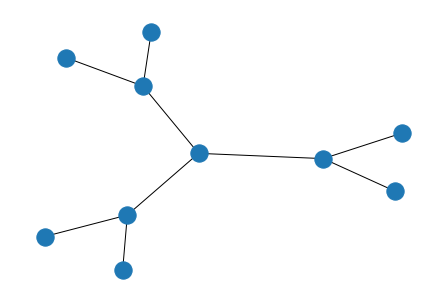

In [ ]:


def draw_cayley(degree, distance, num_nodes, graph, curr_node, curr_distance):
  if distance == 0:
    return
  if num_nodes == 1:
    for i in range(degree):
      graph.add_edge(curr_node, i+2)
      draw_cayley(degree, distance-1, (num_nodes*degree), graph, i+2, 1)
  else:
    for i in range(degree-1):
      graph.add_edge(curr_node, ((curr_node) * degree) + i + 1)
      draw_cayley(degree, distance-1, (num_nodes*degree), graph, ((curr_node) * degree) + i + 1, curr_distance+1)





cayley_ex = nx.Graph()
draw_cayley(3, 2, 1, cayley_ex, 1, 0)

print(cayley_ex.number_of_nodes())
print(cayley_ex.number_of_edges())

nx.draw(cayley_ex)

485
484


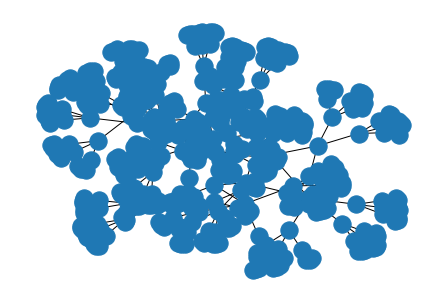

In [ ]:

#draw(cayley) does not work that well. Also, I named child nodes like in a heap for example, assume that the degree is d and parent node is p
#                                                       then the name of the node is ((p) * d) + i + 1 where i is a number iterating from 0 to d
#                                                       This probably led to a bad structure


cayley_ex2 = nx.Graph()
draw_cayley(4, 5, 1, cayley_ex2, 1, 0)

print(cayley_ex2.number_of_nodes())
print(cayley_ex2.number_of_edges())

nx.draw(cayley_ex2)

In [ ]:
cayley_ex = nx.Graph()
draw_cayley(5, 8, 1, cayley_ex, 1, 0)

print(cayley_ex.number_of_nodes())
print(cayley_ex.number_of_edges())

#nx.draw(cayley_ex) takes too long since it has 109226 nodes and 109225 edges
#Therefore I tried to visulize it in Gephi

109226
109225
